In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv('train.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [60]:
df.shape

(9800, 18)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [5]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Since the number of Null Values for Postal Code is very low it will not have much impact on the dataset we can drop them

In [6]:
df = df.dropna()

#### * In order to process the Order Date and Ship date we need to convert them to datetime format to process them.

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d/%m/%Y")
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format="%d/%m/%Y")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9789 non-null   int64         
 1   Order ID       9789 non-null   object        
 2   Order Date     9789 non-null   datetime64[ns]
 3   Ship Date      9789 non-null   datetime64[ns]
 4   Ship Mode      9789 non-null   object        
 5   Customer ID    9789 non-null   object        
 6   Customer Name  9789 non-null   object        
 7   Segment        9789 non-null   object        
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9789 non-null   object        
 13  Product ID     9789 non-null   object        
 14  Category       9789 non-null   object        
 15  Sub-Category   9789 n

##### In order to make it more representable we have converted the datetime objects further in the form of year month and day

In [9]:
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month_name()
df['Order_Day'] = df['Order Date'].dt.day

In [10]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Year,Order_Month,Order_Day
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,November,8
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,November,8
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,June,12
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,October,11
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,October,11


#### Unique Number of Values By Each Feature

In [11]:
df.nunique()

Row ID           9789
Order ID         4916
Order Date       1229
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              48
Postal Code       626
Region              4
Product ID       1860
Category            3
Sub-Category       17
Product Name     1848
Sales            5750
Order_Year          4
Order_Month        12
Order_Day          31
dtype: int64

### Univariate Analysis 

In [12]:
df.Category.value_counts

<bound method IndexOpsMixin.value_counts of 0             Furniture
1             Furniture
2       Office Supplies
3             Furniture
4       Office Supplies
             ...       
9795    Office Supplies
9796    Office Supplies
9797         Technology
9798         Technology
9799         Technology
Name: Category, Length: 9789, dtype: object>

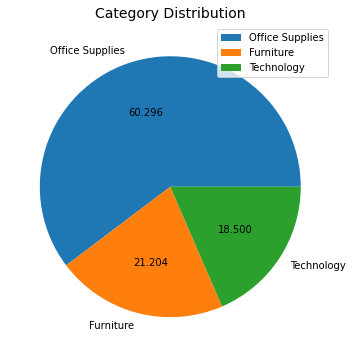

In [61]:
plt.figure(figsize=[6, 6])
plt.pie(df['Category'].value_counts(normalize=True), labels= df['Category'].value_counts().index, autopct="%.3f")
plt.title("Category Distribution", fontsize=14)
plt.legend()
plt.show()

This Graph tells us that the Office Supplies were the most Selling Category in our data set.After that Furniture and then Technology. 

In [14]:
df['Sub-Category'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Bookcases
1            Chairs
2            Labels
3            Tables
4           Storage
           ...     
9795        Binders
9796            Art
9797         Phones
9798         Phones
9799    Accessories
Name: Sub-Category, Length: 9789, dtype: object>

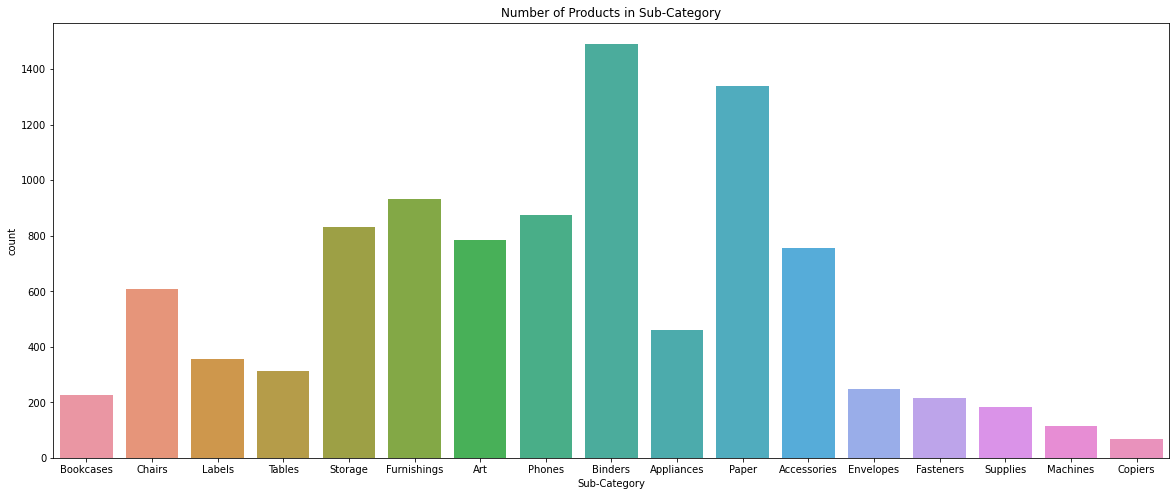

In [63]:
plt.figure(figsize=(20,8))
ax = sns.countplot(df['Sub-Category'])
plt.title('Number of Products in Sub-Category')
plt.show()

By Looking at this Graph we can understand that Binders were the Most Selling Product among each Sub-Categories and then the papers.

In [16]:
df['Region'].value_counts()

West       3140
East       2774
Central    2277
South      1598
Name: Region, dtype: int64

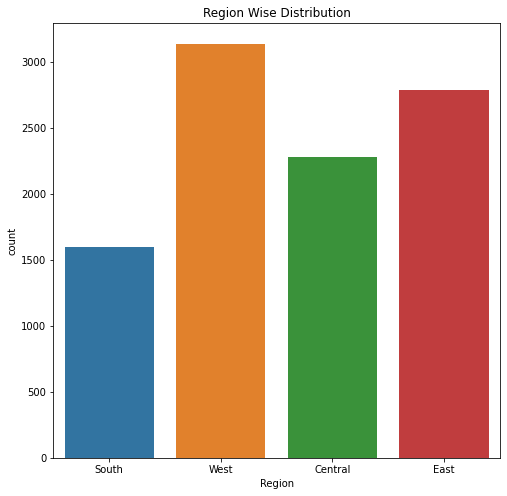

In [65]:
plt.figure(figsize=(8,8))
ax = sns.countplot(df['Region'])
plt.title('Region Wise Distribution')
plt.show()

This graph help us to analyze that West Region is the main Region where most of the Products Sold, after that East Coast has the highest number of Selling.

In [18]:
df['Ship Mode'].value_counts()

Standard Class    5849
Second Class      1901
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

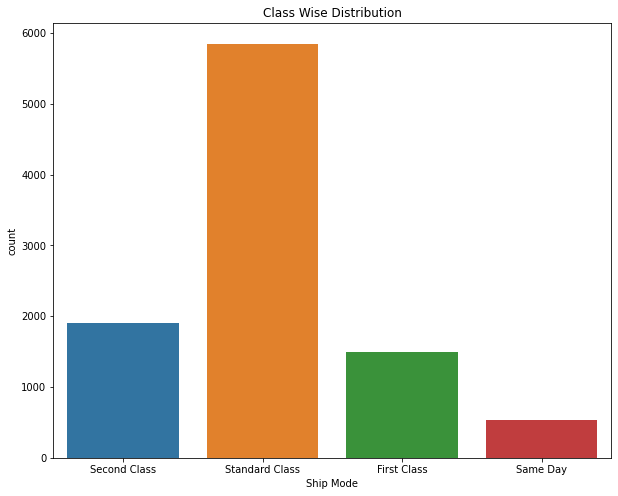

In [19]:
plt.figure(figsize=(10,8))
ax = sns.countplot(df['Ship Mode'])
plt.title('Class Wise Distribution')
plt.show()

This Graph help us understand that most of the orders were placed through Standarad Shipping Method and very few People choose
to use the Same day shipping service.

### Bivariate Analysis

In [20]:
subcategory_selling = df.groupby(df['Sub-Category']).sum()['Sales'].reset_index()
subcategory_selling = subcategory_selling.sort_values("Sales", ascending = False)

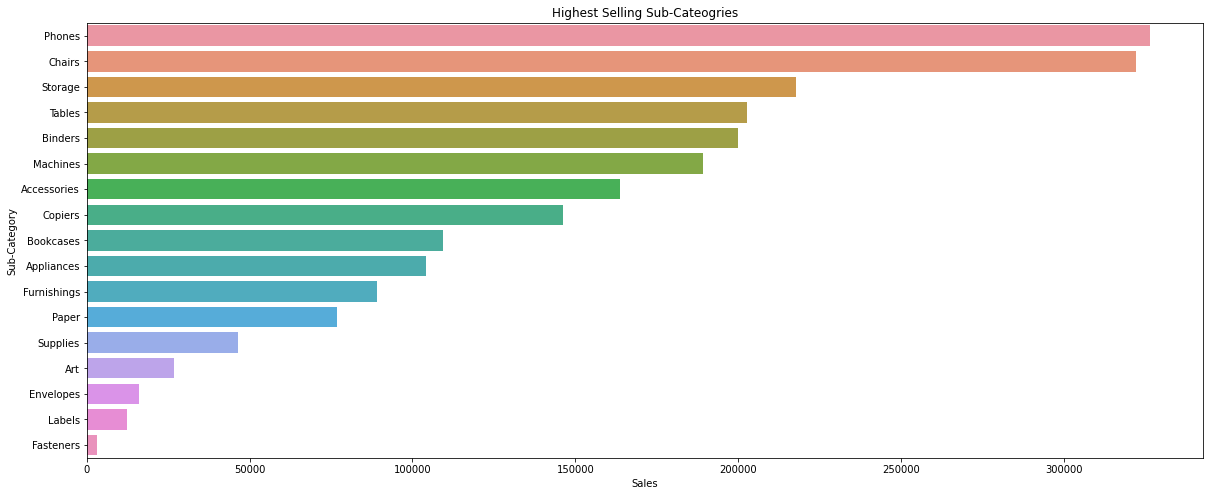

In [21]:
plt.figure(figsize=(20,8))
sns.barplot(data = subcategory_selling, x='Sales', y='Sub-Category', )
plt.title('Highest Selling Sub-Cateogries')
plt.show()

This Graph tells us that the Mobile Phones and Chairs generate the most Number of the sales in Our data set. Where Fasteners were the lowest Selling Products.

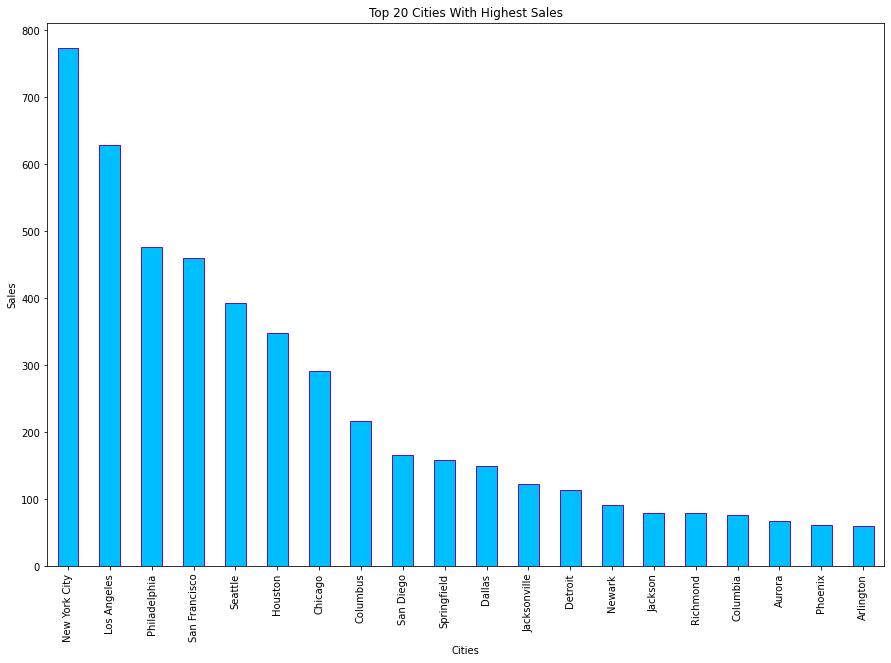

In [22]:
plt.figure(figsize=(15,10))
df.groupby('City')['Sales'].nunique().nlargest(20).plot(kind='bar', color='#00BFFF', edgecolor='#720e9e')
plt.title('Top 20 Cities With Highest Sales')
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.show()

Looking at this Graph we can understand that New York and Los Angeles were the most Sales Producing Cities among the Top 20 Cities.

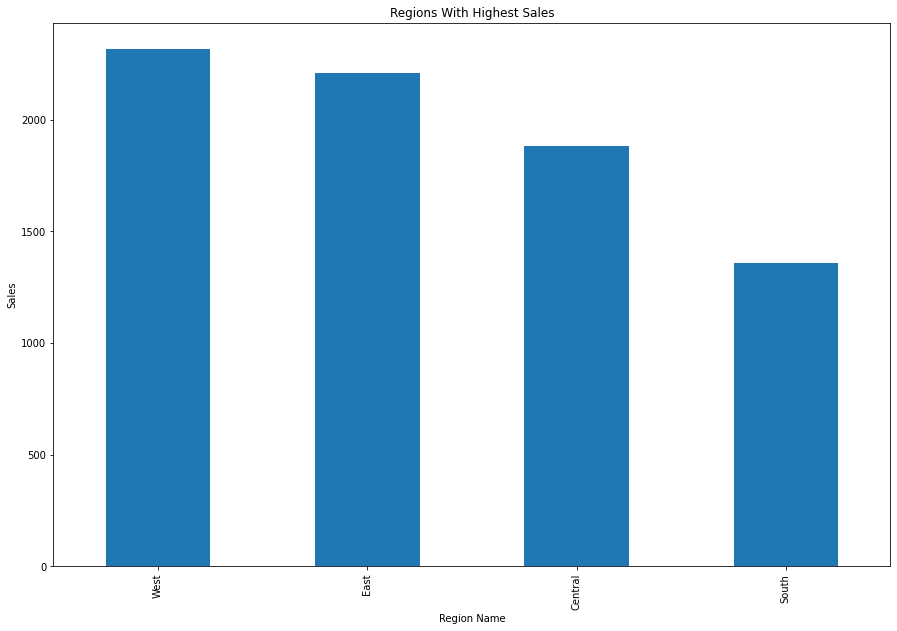

In [23]:
plt.figure(figsize=(15,10))
df.groupby('Region')['Sales'].nunique().nlargest().plot(kind='bar')
plt.title('Regions With Highest Sales')
plt.xlabel('Region Name')
plt.ylabel('Sales')
plt.show()

By Looking at this Graph we can say that most of the Sales activity was generated in the West Coast.

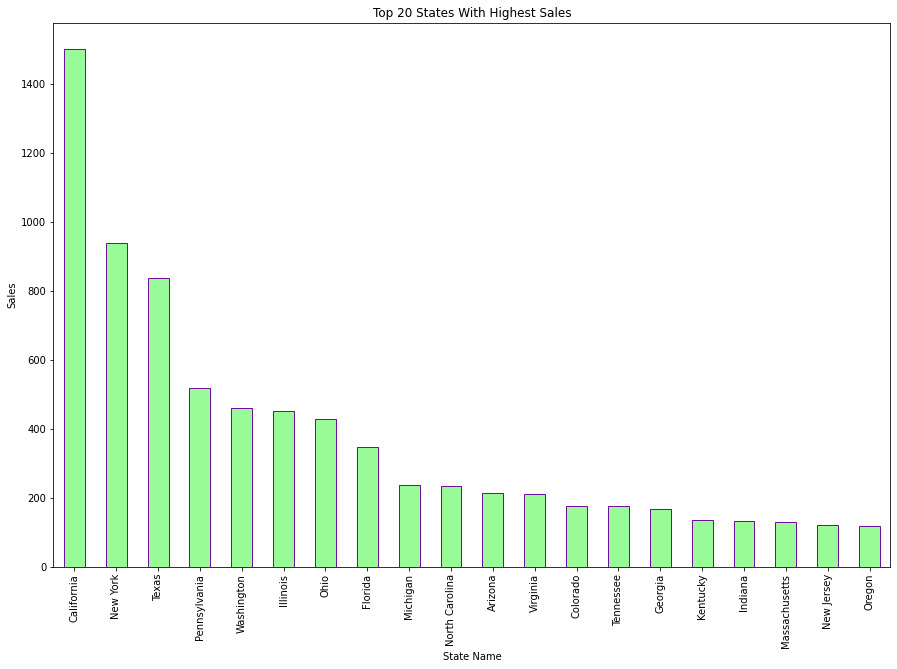

In [24]:
plt.figure(figsize=(15,10))
df.groupby('State')['Sales'].nunique().nlargest(20).plot(kind='bar', color='#98FB98', edgecolor='#720e9e')
plt.title('Top 20 States With Highest Sales')
plt.xlabel('State Name')
plt.ylabel('Sales')
plt.show()

By analyzing this Graph we Can see that Most of the Sales were Generated by the California State and the State with Lowest Revenue was the Oregon among the the Top 20 States.

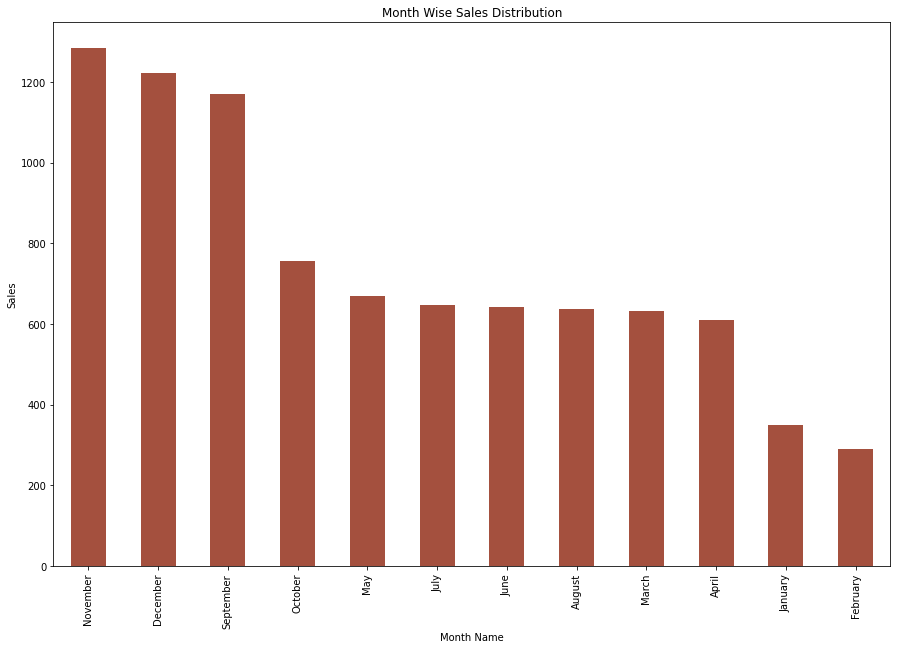

In [25]:
plt.figure(figsize=(15,10))
df.groupby('Order_Month')['Sales'].nunique().nlargest(12).plot(kind='bar', color='#A4503E')
plt.title('Month Wise Sales Distribution')
plt.xlabel('Month Name')
plt.ylabel('Sales')
plt.show()

This graph help us to analyze which month has the highest amount of Sales activity and we can understand that November and December are the Months with Highest amount of the Sales. That's maybe due to Holiday season.

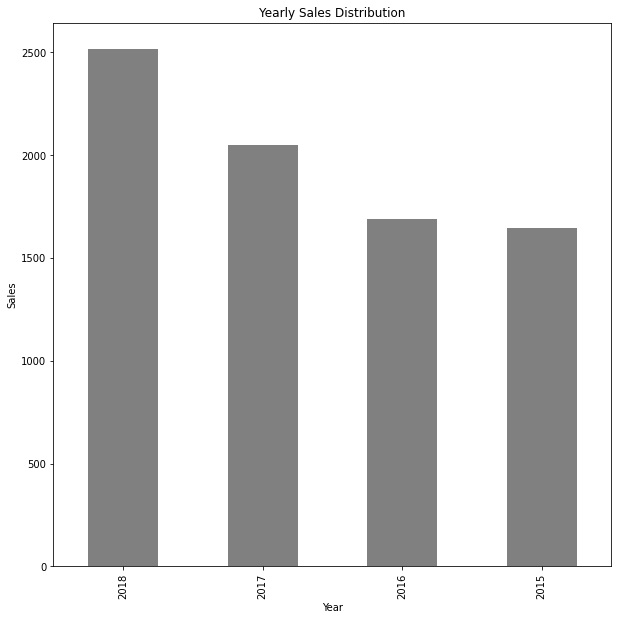

In [26]:
plt.figure(figsize=(10,10))
df.groupby('Order_Year')['Sales'].nunique().nlargest().plot(kind='bar', color='grey')
plt.title('Yearly Sales Distribution')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

By analyzing this graph we can understand that Our Sales are increasing from 2015 to 2018.

In [27]:
topSoldproducts = df['Product Name'].value_counts()
topSoldproducts = topSoldproducts.head(10)

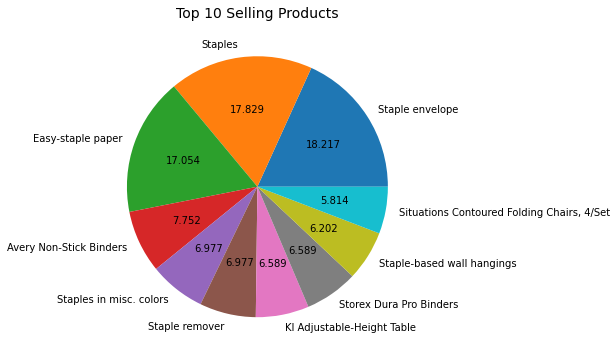

In [28]:
plt.figure(figsize=[6, 6])
plt.pie(topSoldproducts, labels= topSoldproducts.index, autopct="%.3f")
plt.title("Top 10 Selling Products", fontsize=14)
plt.show()

This Chart tells us that the Highest number of Products Sold.

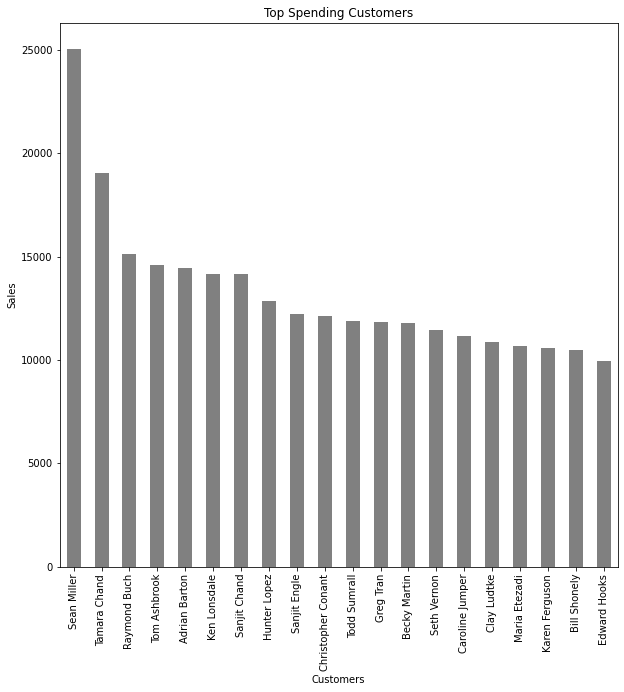

In [66]:
plt.figure(figsize=(10,10))
df.groupby('Customer Name')['Sales'].sum().nlargest(20).plot(kind='bar', color='grey')
plt.title('Top Spending Customers')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

This Graph help us understand the Top 10 Spending Customers over the Past three Years.

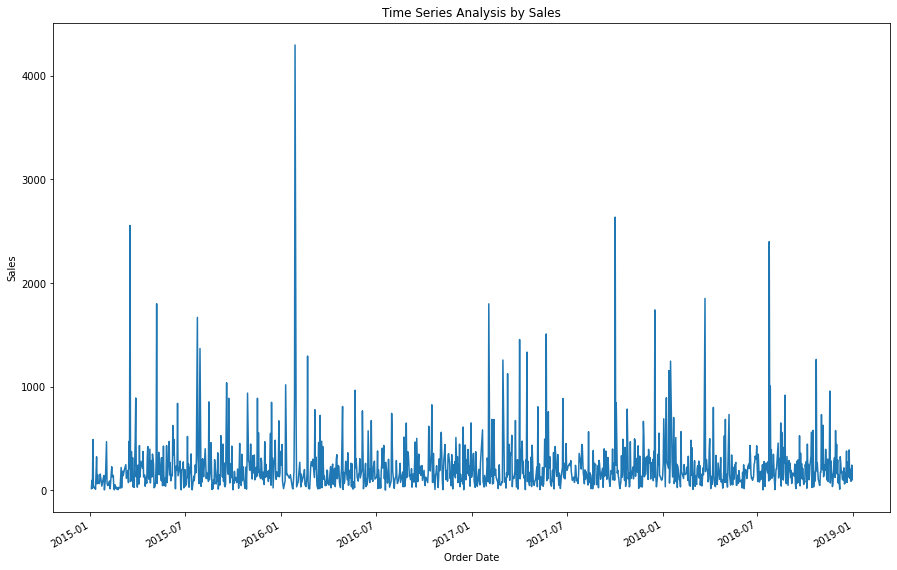

In [30]:
df.groupby('Order Date')['Sales'].mean().plot(figsize=(15,10))
plt.title('Time Series Analysis by Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

This Graph help us understand at which point of each year most of the Sales occured.

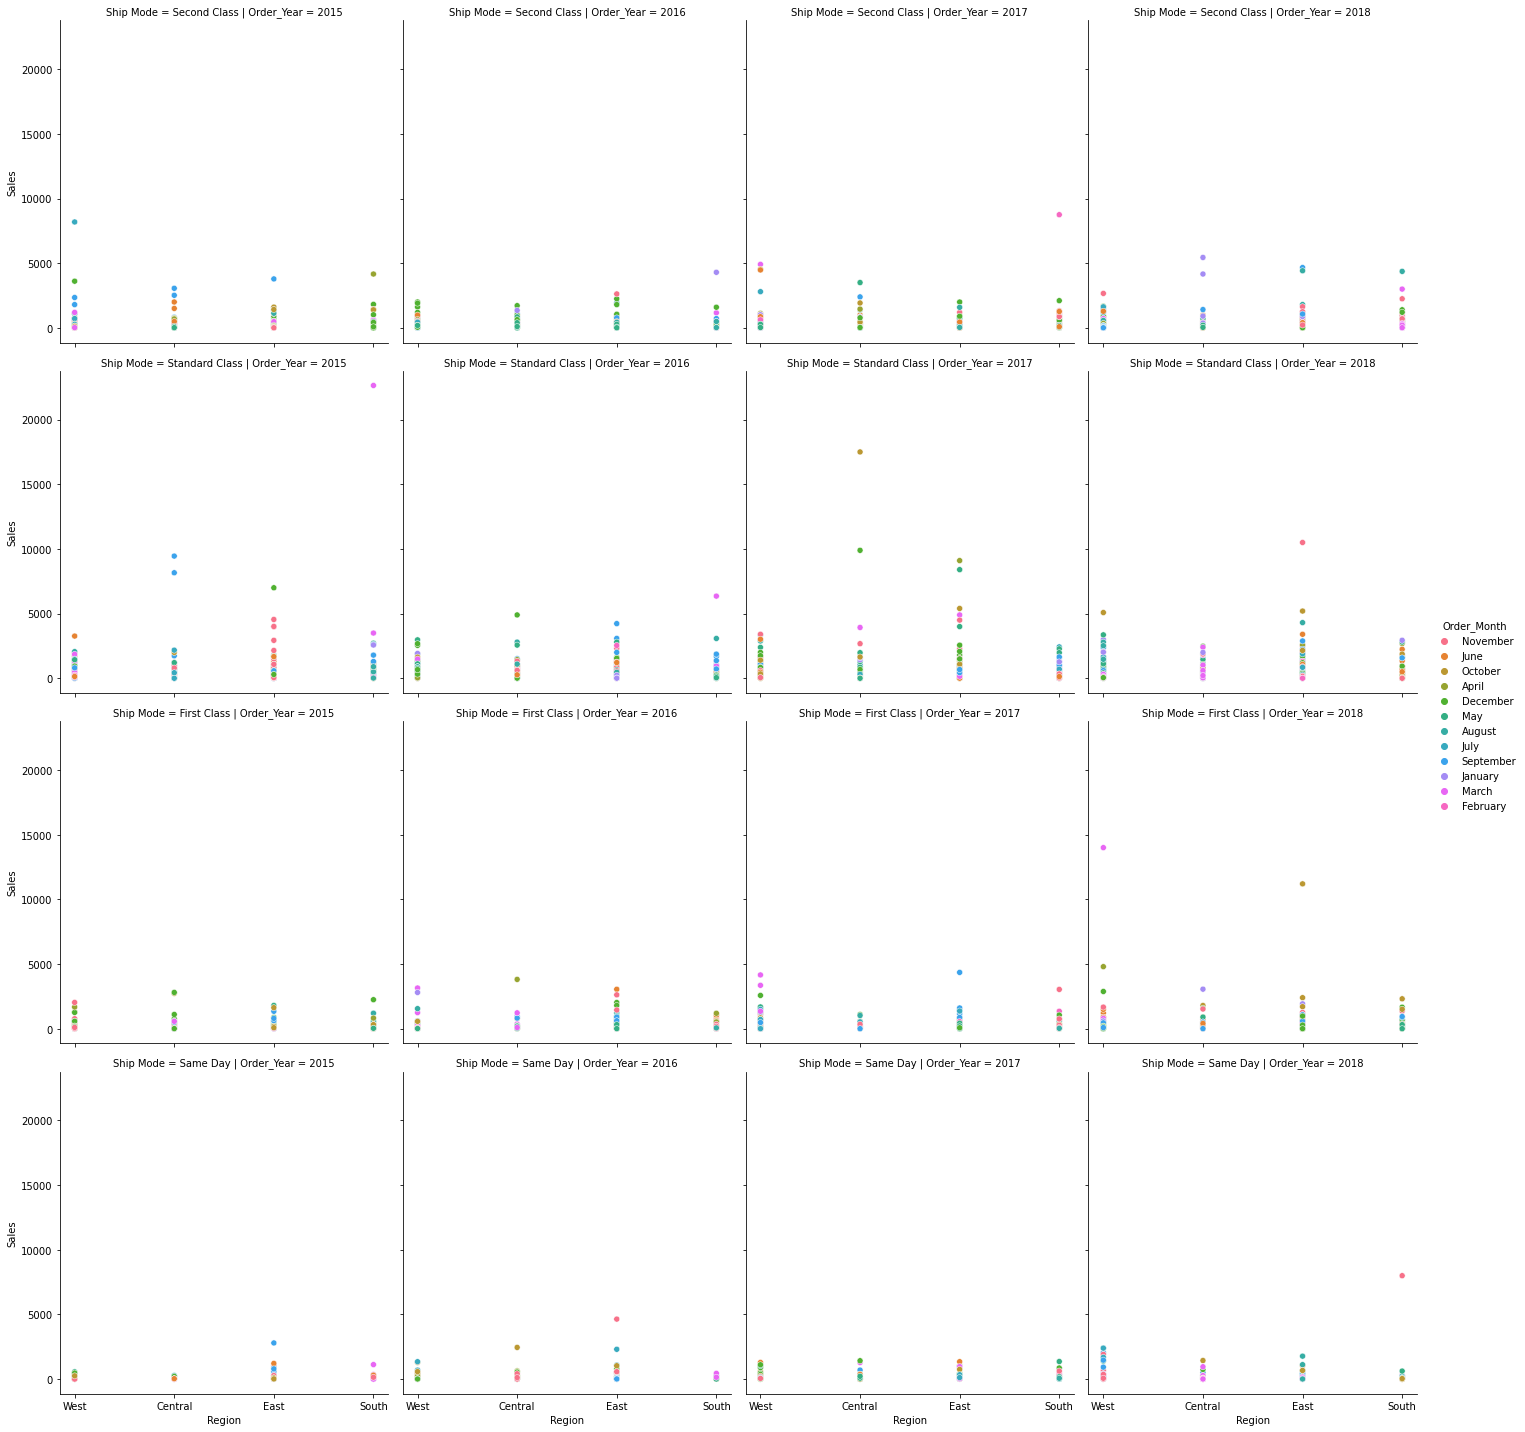

In [31]:
sns.relplot(x='Region', y='Sales', data=df, hue='Order_Month', col='Order_Year', row='Ship Mode')

This Graph help us understand that at which point of each year we generated the most number of Sales by using Which Shipping Class.

### Clustering

Let's implement Feature Extraction to create a dataset with interesting data about the customers.

In [32]:
df.groupby(['Customer Name', 'Category']).Sales.mean().unstack()

Category,Furniture,Office Supplies,Technology
Customer Name,,,
Aaron Bergman,195.336000,91.168000,221.980000
Aaron Hawkins,182.953000,96.552000,351.465000
Aaron Smayling,324.477000,44.342667,1067.841000
Adam Bellavance,871.436000,412.131000,65.246667
Adam Hart,272.520333,111.508846,165.600000
...,...,...,...
Xylona Preis,202.824500,62.771714,81.718000
Yana Sorensen,287.074667,702.902500,236.000000
Yoseph Carroll,124.410000,760.076000,764.780000


In [33]:
df_customer = pd.DataFrame(df.groupby('Customer Name').Sales.sum(), columns=['Customer', 'Total_Sales'])

In [34]:
df_customer.Customer = df['Customer Name'].unique()
df_customer = df_customer.sort_values('Customer').reset_index(drop=True)
df_customer

,Customer,Total_Sales
0,Aaron Bergman,NaN
1,Aaron Hawkins,NaN
2,Aaron Smayling,NaN
3,Adam Bellavance,NaN
4,Adam Hart,NaN
...,...,...
788,Xylona Preis,NaN
789,Yana Sorensen,NaN
790,Yoseph Carroll,NaN
791,Zuschuss Carroll,NaN


In [35]:
df_customer.Total_Sales = df.groupby('Customer Name').Sales.sum().values
df_customer

,Customer,Total_Sales
0,Aaron Bergman,886.156
1,Aaron Hawkins,1744.700
2,Aaron Smayling,3050.692
3,Adam Bellavance,7755.620
4,Adam Hart,3250.337
...,...,...
788,Xylona Preis,2374.658
789,Yana Sorensen,6720.444
790,Yoseph Carroll,5454.350
791,Zuschuss Carroll,8025.707


In [36]:
df_category = df.groupby(['Customer Name', 'Category']).Sales.mean().unstack()
for c in df_category.columns:
    df_customer[c + '_Mean_Sales'] = df_category[c].values
df_customer

,Customer,Total_Sales,Furniture_Mean_Sales,Office Supplies_Mean_Sales,Technology_Mean_Sales
0,Aaron Bergman,886.156,195.336000,91.168000,221.980000
1,Aaron Hawkins,1744.700,182.953000,96.552000,351.465000
2,Aaron Smayling,3050.692,324.477000,44.342667,1067.841000
3,Adam Bellavance,7755.620,871.436000,412.131000,65.246667
4,Adam Hart,3250.337,272.520333,111.508846,165.600000
...,...,...,...,...,...
788,Xylona Preis,2374.658,202.824500,62.771714,81.718000
789,Yana Sorensen,6720.444,287.074667,702.902500,236.000000
790,Yoseph Carroll,5454.350,124.410000,760.076000,764.780000
791,Zuschuss Carroll,8025.707,487.461250,107.037941,384.395333


In [37]:
df_year = df.groupby(['Customer Name', 'Order_Year']).count()['Row ID'].unstack()
for c in df_year.columns:
    df_customer[str(c) + '_Number_Sales'] = df_year[c].values
df_customer

,Customer,Total_Sales,Furniture_Mean_Sales,Office Supplies_Mean_Sales,Technology_Mean_Sales,2015_Number_Sales,2016_Number_Sales,2017_Number_Sales,2018_Number_Sales
0,Aaron Bergman,886.156,195.336000,91.168000,221.980000,4.0,NaN,2.0,NaN
1,Aaron Hawkins,1744.700,182.953000,96.552000,351.465000,7.0,2.0,1.0,1.0
2,Aaron Smayling,3050.692,324.477000,44.342667,1067.841000,1.0,NaN,2.0,7.0
3,Adam Bellavance,7755.620,871.436000,412.131000,65.246667,NaN,1.0,9.0,8.0
4,Adam Hart,3250.337,272.520333,111.508846,165.600000,1.0,1.0,6.0,12.0
...,...,...,...,...,...,...,...,...,...
788,Xylona Preis,2374.658,202.824500,62.771714,81.718000,10.0,3.0,9.0,6.0
789,Yana Sorensen,6720.444,287.074667,702.902500,236.000000,NaN,5.0,NaN,7.0
790,Yoseph Carroll,5454.350,124.410000,760.076000,764.780000,3.0,1.0,3.0,1.0
791,Zuschuss Carroll,8025.707,487.461250,107.037941,384.395333,5.0,9.0,9.0,8.0


In [38]:
df_region = df.groupby(['Customer Name', 'Region']).count()['Row ID'].unstack()
for c in df_region.columns:
    df_customer[c + '_Number_Sales'] = df_region[c].values
df_customer

,Customer,Total_Sales,Furniture_Mean_Sales,Office Supplies_Mean_Sales,Technology_Mean_Sales,2015_Number_Sales,2016_Number_Sales,2017_Number_Sales,2018_Number_Sales,Central_Number_Sales,East_Number_Sales,South_Number_Sales,West_Number_Sales
0,Aaron Bergman,886.156,195.336000,91.168000,221.980000,4.0,NaN,2.0,NaN,3.0,NaN,NaN,3.0
1,Aaron Hawkins,1744.700,182.953000,96.552000,351.465000,7.0,2.0,1.0,1.0,NaN,5.0,1.0,5.0
2,Aaron Smayling,3050.692,324.477000,44.342667,1067.841000,1.0,NaN,2.0,7.0,2.0,1.0,4.0,3.0
3,Adam Bellavance,7755.620,871.436000,412.131000,65.246667,NaN,1.0,9.0,8.0,3.0,7.0,3.0,5.0
4,Adam Hart,3250.337,272.520333,111.508846,165.600000,1.0,1.0,6.0,12.0,2.0,10.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,Xylona Preis,2374.658,202.824500,62.771714,81.718000,10.0,3.0,9.0,6.0,11.0,3.0,2.0,12.0
789,Yana Sorensen,6720.444,287.074667,702.902500,236.000000,NaN,5.0,NaN,7.0,NaN,1.0,4.0,7.0
790,Yoseph Carroll,5454.350,124.410000,760.076000,764.780000,3.0,1.0,3.0,1.0,3.0,3.0,NaN,2.0
791,Zuschuss Carroll,8025.707,487.461250,107.037941,384.395333,5.0,9.0,9.0,8.0,11.0,1.0,3.0,16.0


In [39]:
df_customer.fillna(0, inplace=True)
df_customer

,Customer,Total_Sales,Furniture_Mean_Sales,Office Supplies_Mean_Sales,Technology_Mean_Sales,2015_Number_Sales,2016_Number_Sales,2017_Number_Sales,2018_Number_Sales,Central_Number_Sales,East_Number_Sales,South_Number_Sales,West_Number_Sales
0,Aaron Bergman,886.156,195.336000,91.168000,221.980000,4.0,0.0,2.0,0.0,3.0,0.0,0.0,3.0
1,Aaron Hawkins,1744.700,182.953000,96.552000,351.465000,7.0,2.0,1.0,1.0,0.0,5.0,1.0,5.0
2,Aaron Smayling,3050.692,324.477000,44.342667,1067.841000,1.0,0.0,2.0,7.0,2.0,1.0,4.0,3.0
3,Adam Bellavance,7755.620,871.436000,412.131000,65.246667,0.0,1.0,9.0,8.0,3.0,7.0,3.0,5.0
4,Adam Hart,3250.337,272.520333,111.508846,165.600000,1.0,1.0,6.0,12.0,2.0,10.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,Xylona Preis,2374.658,202.824500,62.771714,81.718000,10.0,3.0,9.0,6.0,11.0,3.0,2.0,12.0
789,Yana Sorensen,6720.444,287.074667,702.902500,236.000000,0.0,5.0,0.0,7.0,0.0,1.0,4.0,7.0
790,Yoseph Carroll,5454.350,124.410000,760.076000,764.780000,3.0,1.0,3.0,1.0,3.0,3.0,0.0,2.0
791,Zuschuss Carroll,8025.707,487.461250,107.037941,384.395333,5.0,9.0,9.0,8.0,11.0,1.0,3.0,16.0


In [40]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_customer.drop('Customer', axis=1))

In [41]:
df_scaled = pd.DataFrame(df_scaled, columns=df_customer.columns.drop('Customer'))
df_scaled

,Total_Sales,Furniture_Mean_Sales,Office Supplies_Mean_Sales,Technology_Mean_Sales,2015_Number_Sales,2016_Number_Sales,2017_Number_Sales,2018_Number_Sales,Central_Number_Sales,East_Number_Sales,South_Number_Sales,West_Number_Sales
0,-0.746746,-0.334300,-0.152187,-0.234500,0.594429,-0.937913,-0.370776,-1.206536,0.044576,-1.125214,-0.840362,-0.272834
1,-0.418720,-0.369066,-0.119504,-0.052019,1.754517,-0.213349,-0.682243,-0.912413,-0.995084,0.483104,-0.423336,0.295779
2,0.080265,0.028265,-0.436428,0.957560,-0.565659,-0.937913,-0.370776,0.852327,-0.301978,-0.803550,0.827741,-0.272834
3,1.877892,1.563860,1.796137,-0.455382,-0.952354,-0.575631,1.809496,1.146450,0.044576,1.126431,0.410715,0.295779
4,0.156544,-0.117604,-0.028713,-0.313956,-0.565659,-0.575631,0.875094,2.322944,-0.301978,2.091421,0.410715,0.295779
...,...,...,...,...,...,...,...,...,...,...,...,...
788,-0.178030,-0.313276,-0.324559,-0.432170,2.914604,0.148933,1.809496,0.558204,2.817001,-0.160223,-0.006311,2.285923
789,1.482379,-0.076743,3.561191,-0.214742,-0.952354,0.873497,-0.993711,0.852327,-0.995084,-0.803550,0.827741,0.864391
790,0.998639,-0.533426,3.908248,0.530460,0.207733,-0.575631,-0.059308,-0.912413,0.044576,-0.160223,-0.840362,-0.557140
791,1.981085,0.485845,-0.055852,-0.005611,0.981125,2.322626,1.809496,1.146450,2.817001,-0.803550,0.410715,3.423148


Below we plot the correlation heatmap to quantify the correlation between the features we managed to extract from our initial dataset. We can see that the only features that achieve correlation above 0.6 are Technology_Mean_Sales and Total_Sales, suggesting that the sales of the technology category represent a considerable part of the total sales.

<AxesSubplot:>

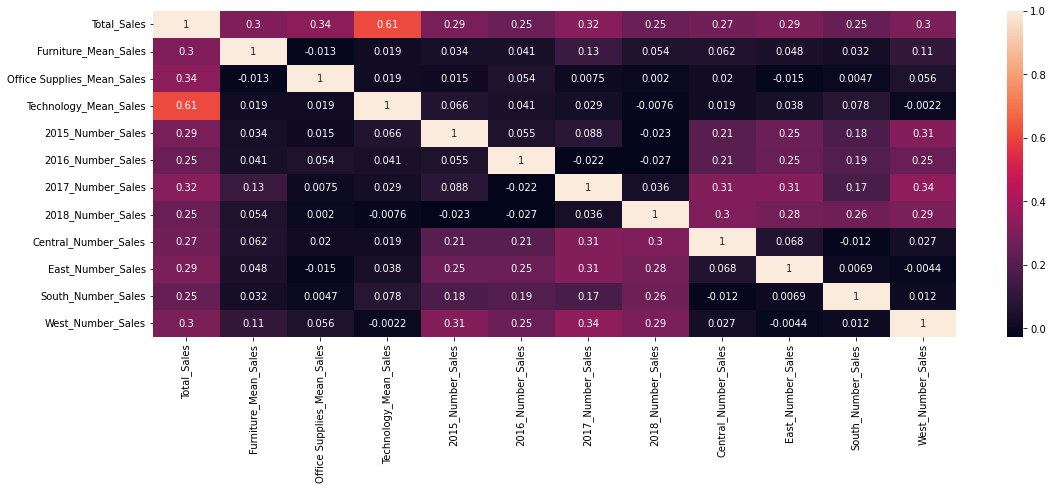

In [42]:
%matplotlib inline
# Correlation matrix
cor = df_scaled.corr ()
#PLotting Heatmap
plt.figure(figsize=(18,6))
sns.heatmap(cor, annot = True)

##### K-Means

In [56]:
sse = []
for i in range(2,6):
    model = KMeans(n_clusters=i, random_state=13)
    label = model.fit_predict(df_scaled)
    print(f'{i} :', silhouette_score(df_scaled, label))
    sse.append(model.inertia_)


2 : 0.216017216245985
3 : 0.14259474584243145
4 : 0.19239091102365297
5 : 0.15113182936023561


The number of clusters that achieved the best Silhouette Score is 2. So we're going to divide the dataset into 2 clusters.

In [45]:
model = KMeans(n_clusters=2, random_state=13)
label = model.fit_predict(df_scaled)

Next, let's use PCA to make the clustering visualizable in 2D. This is achieved by mapping the dataset into 2 features while maintaining the maximum variance.

In [46]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [47]:
df_pca = pd.DataFrame(df_pca)

<AxesSubplot:xlabel='0', ylabel='1'>

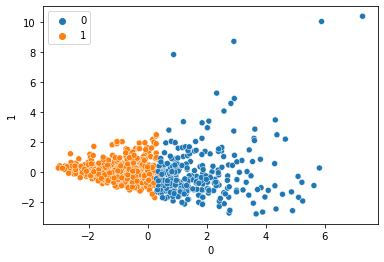

In [48]:
sns.scatterplot(x=df_pca[0], y=df_pca[1], data=df_pca, hue=label)

Let's reverse the dataset from the StandardScaler to check the mean value for each cluster for each of the features.

In [49]:
inversed = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)

In [50]:
inversed['label'] = label

In the table below we can see that one of the clusters have all the mean values higher than the other. This suggests that the best way to categorize the customers is into 2 groups, one that purchases considerably more than the other.

In [51]:
inversed.groupby('label').mean()

,Total_Sales,Furniture_Mean_Sales,Office Supplies_Mean_Sales,Technology_Mean_Sales,2015_Number_Sales,2016_Number_Sales,2017_Number_Sales,2018_Number_Sales,Central_Number_Sales,East_Number_Sales,South_Number_Sales,West_Number_Sales
label,,,,,,,,,,,,
0,4978.751633,424.984743,154.052293,590.13940,3.792517,3.670068,4.948980,5.931973,4.479592,5.057823,3.017007,5.789116
1,1580.870606,249.260831,93.960119,269.50215,1.679359,1.951904,2.154309,3.024048,1.923848,2.579158,1.424850,2.881764
